Opening raw data file data\raw\right_left_7_raw.fif...
Isotrak not found
    Range : 0 ... 15774 =      0.000 ...    61.617 secs
Ready.
Reading 0 ... 15774  =      0.000 ...    61.617 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 57 samples (0.223 s)

Setting 496 of 15775 (3.14%) samples to NaN, retaining 15279 (96.86%) samples.
Setting up low-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passba

c:\Users\cscrawford\AppData\Local\anaconda3\envs\crown-mne\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


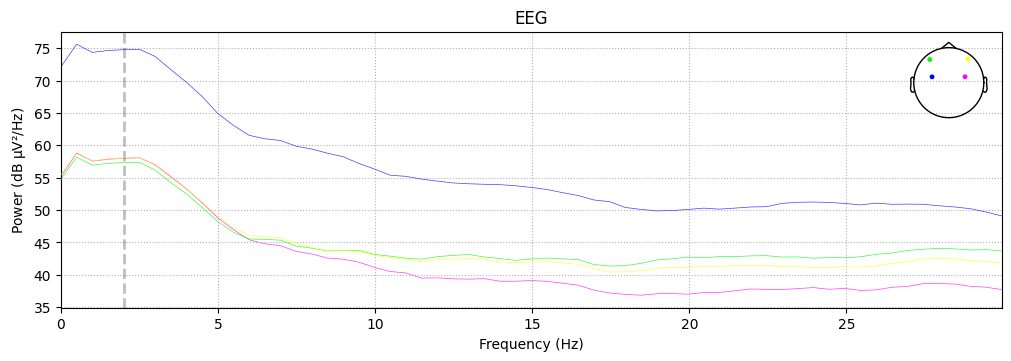

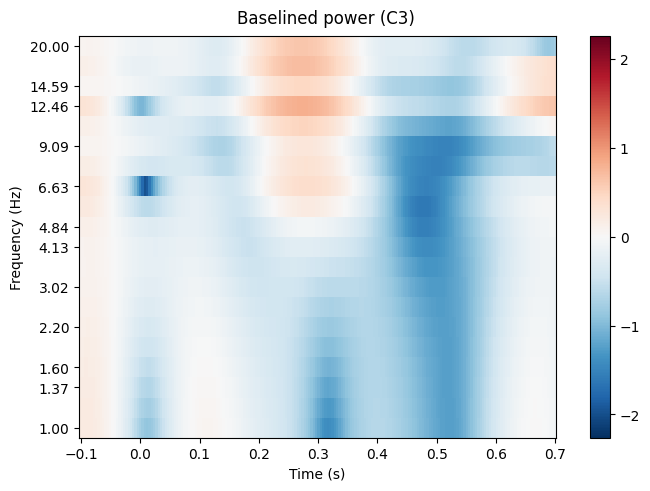

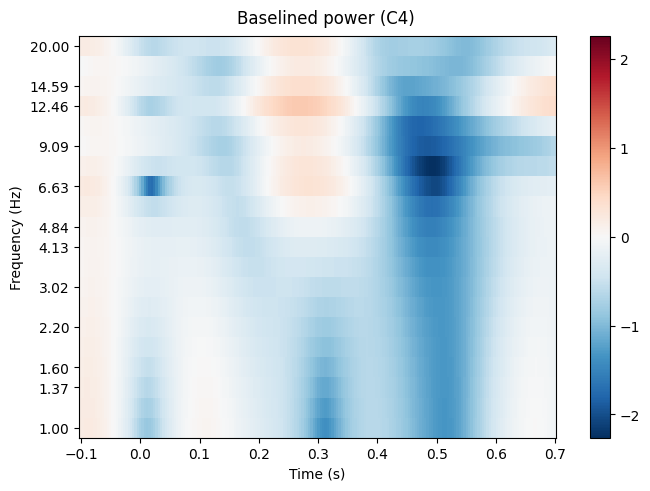

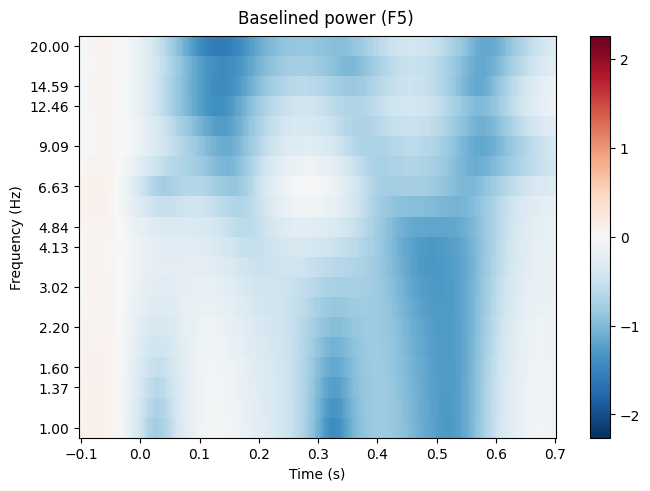

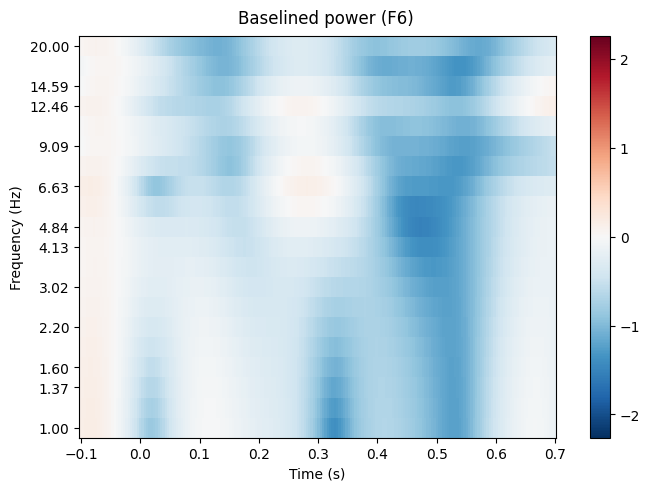

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


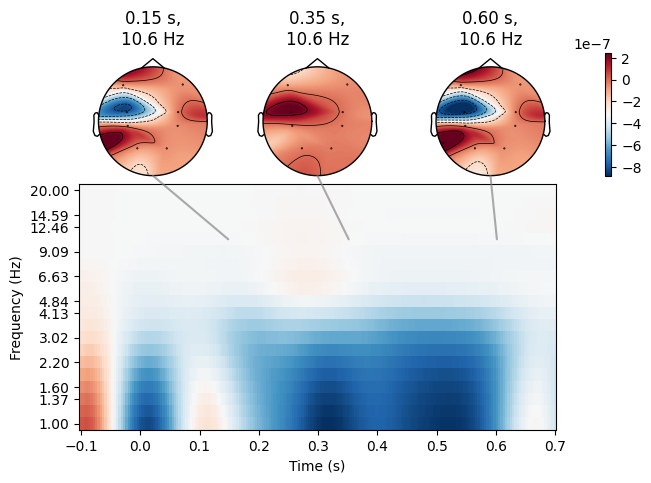

Using data from preloaded Raw for 10 events and 513 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...
Using data from preloaded Raw for 5 events and 513 original time points ...
Applying baseline correction (mode: logratio)


c:\Users\cscrawford\AppData\Local\anaconda3\envs\crown-mne\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


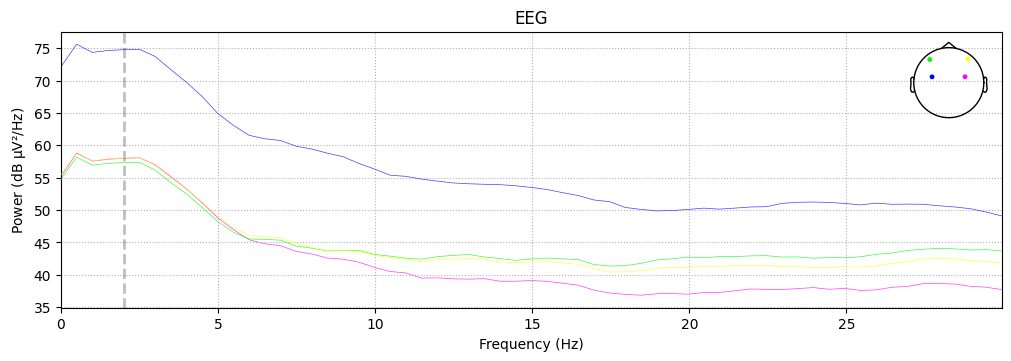

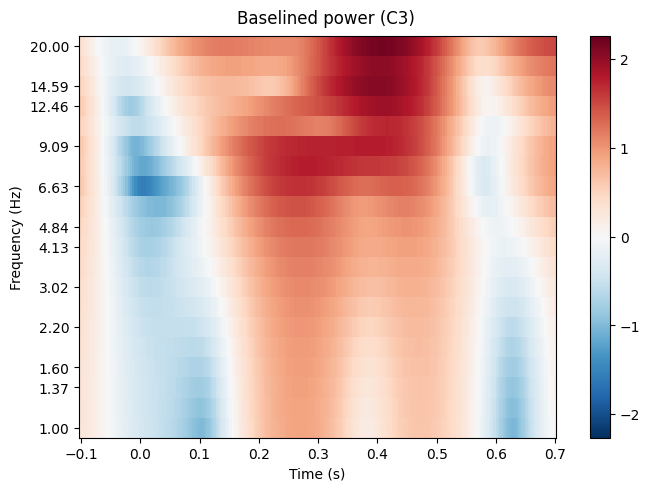

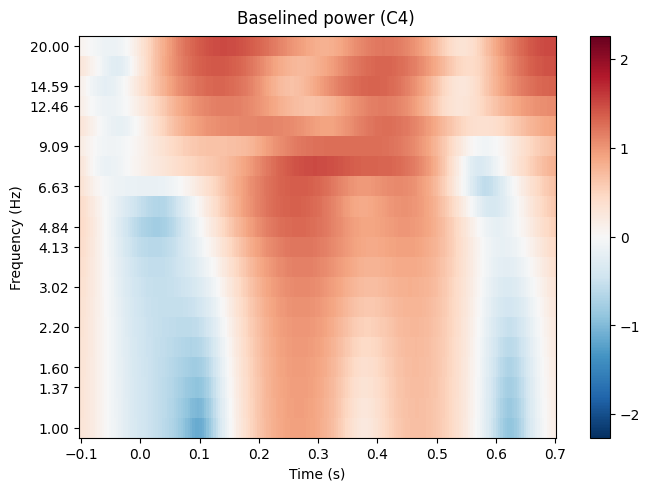

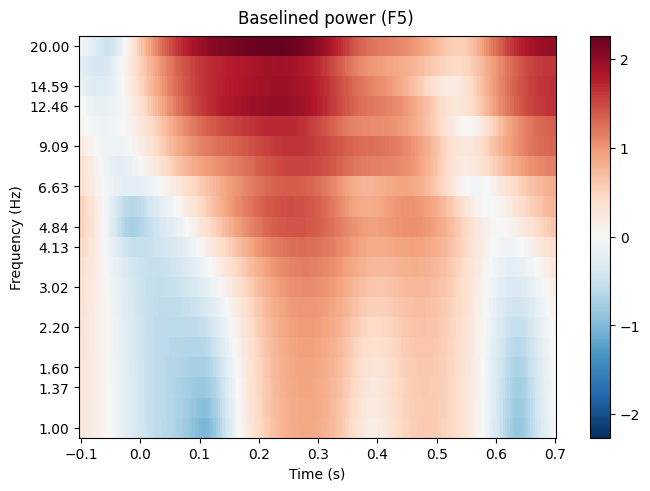

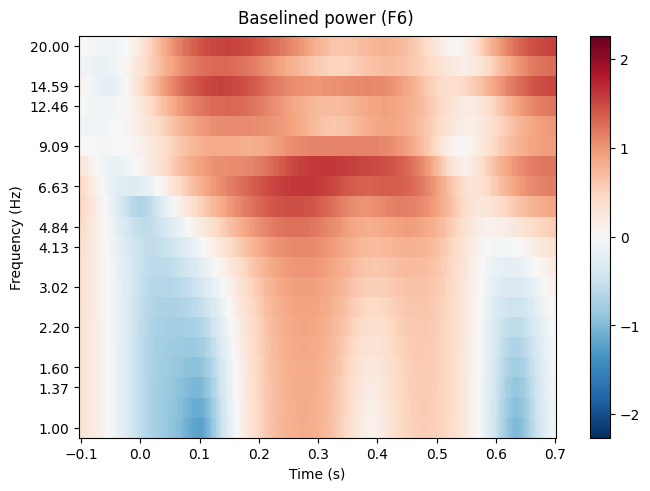

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


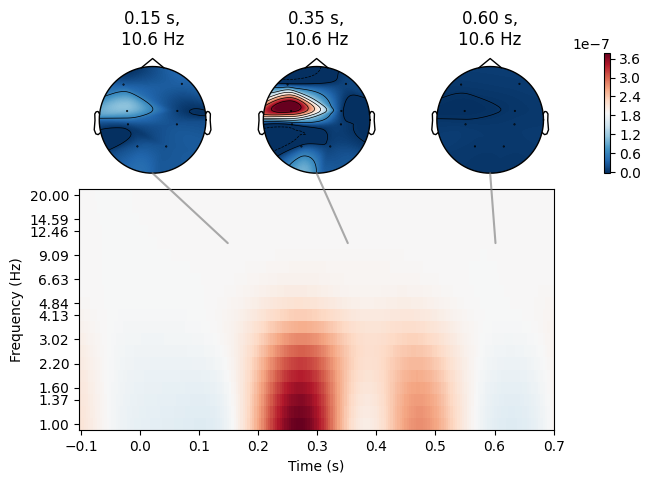

Using data from preloaded Raw for 5 events and 513 original time points ...
Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated
combining channels using GFP (eeg channels)


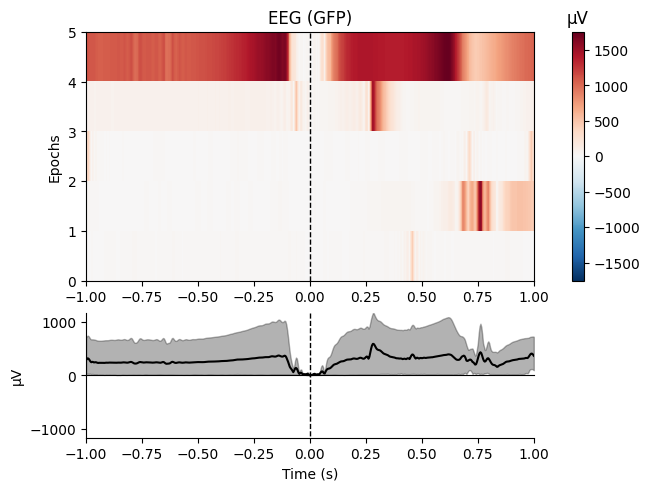

[<Figure size 640x480 with 3 Axes>]

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.pipeline import Pipeline

from mne import Epochs, pick_types
from mne.channels import make_standard_montage
from mne.datasets import eegbci
from mne.decoding import CSP
from mne.io import concatenate_raws, read_raw_edf

from htil_eeg import HTIL_EEG 
from brainflow import BoardIds



h_eeg = HTIL_EEG(BoardIds.CROWN_BOARD, real_time=False, z_score_threshold=0.25)

event_dict = {"right": 1, "left": 2}
events_colors =  {1:"green"}
l_freq=2
h_freq=30
show_muscle_artifacts=False
freqs = np.logspace(*np.log10([1, 20]), num=20)
n_cycles = freqs / 2.0
baseline = (-0.1, 0)
mode="logratio"
epochs = h_eeg.raw_events_to_epochs("data/raw/right_left_7_raw.fif", "data/events/right_left_7_events.csv", event_dict, events_colors, l_freq=l_freq, h_freq=h_freq, show_muscle_artifacts=show_muscle_artifacts)

epochs.compute_psd(fmax=30).plot(picks=["C3","C4", "F5", "F6"])
epochs_tfr = epochs["left"].compute_tfr("morlet", n_cycles=n_cycles, return_itc=False, freqs=freqs, average=True, use_fft=True)
epochs_tfr.crop(-0.1, 0.7)
epochs_tfr.plot(title="auto", picks=["C3", "C4", "F5", "F6"], baseline=baseline, mode="logratio") # vmax=1e-8,


target_freq = 11
epochs_tfr.plot_joint(picks=['F6', "C3", "F5"], timefreqs=((0.15, target_freq), (0.35, target_freq), (0.6, target_freq)),  baseline=baseline)


epochs.compute_psd(fmax=30).plot(picks=["C3","C4", "F5", "F6"])
epochs_tfr = epochs["right"].compute_tfr("morlet", n_cycles=n_cycles, return_itc=False, freqs=freqs, average=True, use_fft=True)
epochs_tfr.crop(-0.1, 0.7)
epochs_tfr.plot(title="auto", picks=["C3", "C4", "F5", "F6"], baseline=baseline, mode="logratio") # vmax=1e-8,
target_freq = 11
epochs_tfr.plot_joint(picks=['F6', "C3", "F5"], timefreqs=((0.15, target_freq), (0.35, target_freq), (0.6, target_freq)),  baseline=baseline)


left =  epochs["left"]


left.plot_image()



Opening raw data file data\raw\closed_6_raw.fif...
Isotrak not found
    Range : 0 ... 5533 =      0.000 ...    21.613 secs
Ready.
Reading 0 ... 5533  =      0.000 ...    21.613 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 57 samples (0.223 s)

Setting 126 of 5534 (2.28%) samples to NaN, retaining 5408 (97.72%) samples.
Setting up low-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge:

c:\Users\cscrawford\AppData\Local\anaconda3\envs\crown-mne\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


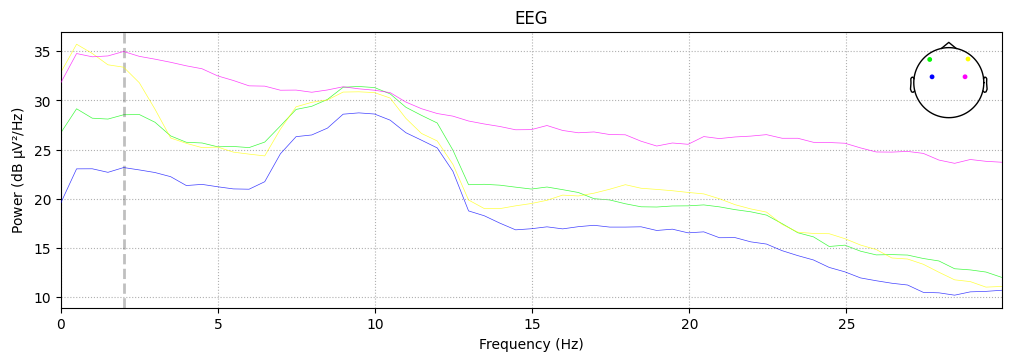

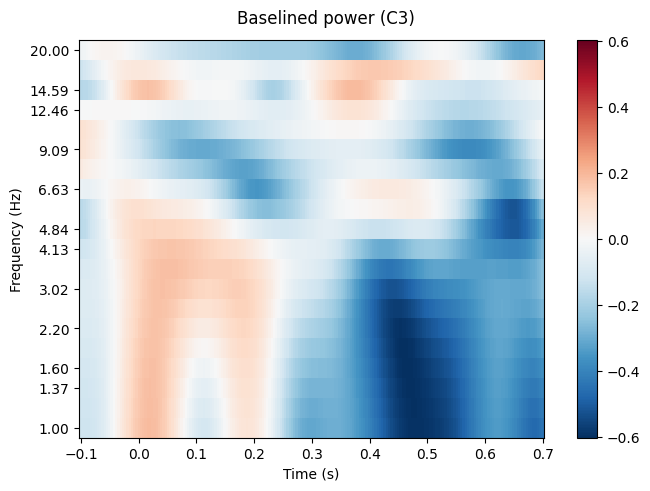

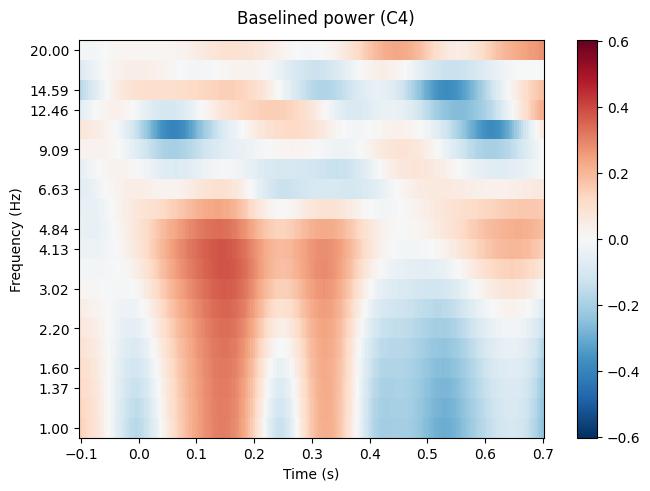

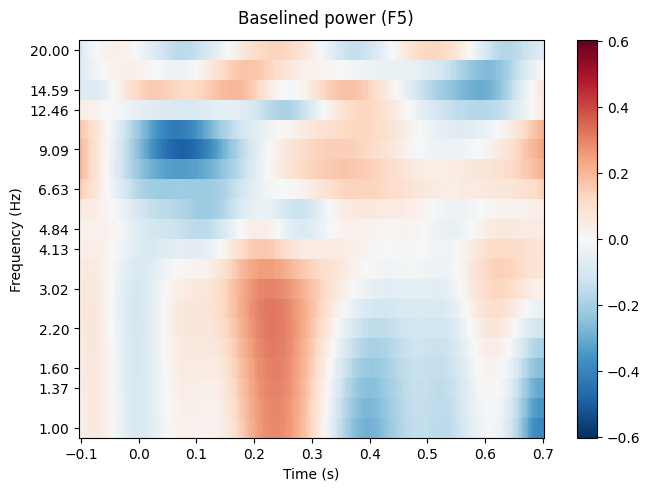

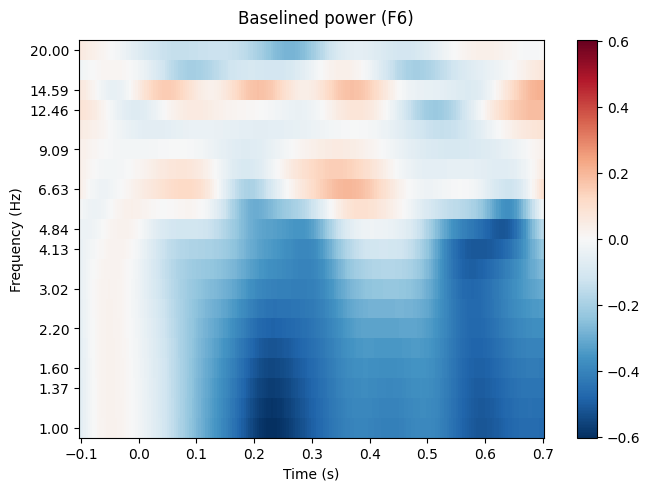

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


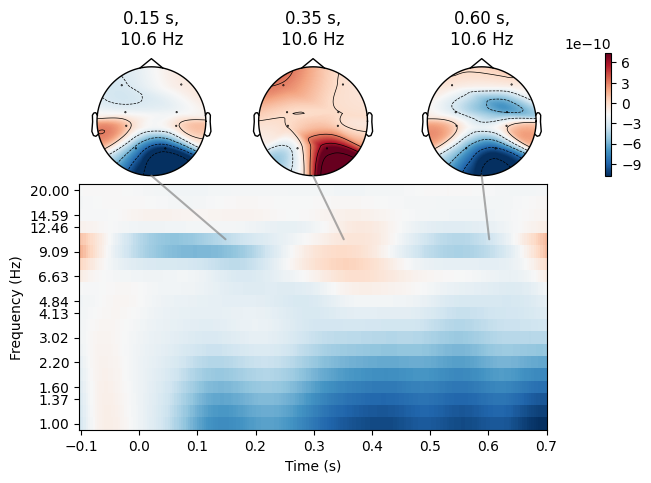

No baseline correction applied


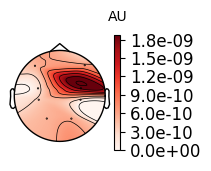

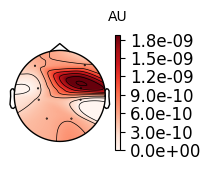

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.pipeline import Pipeline

from mne import Epochs, pick_types
from mne.channels import make_standard_montage
from mne.datasets import eegbci
from mne.decoding import CSP
from mne.io import concatenate_raws, read_raw_edf

from htil_eeg import HTIL_EEG 
from brainflow import BoardIds



h_eeg = HTIL_EEG(BoardIds.CROWN_BOARD, real_time=False, z_score_threshold=0.25)

event_dict = {"closed": 1}
events_colors =  {1:"green"}
l_freq=2
h_freq=30
show_muscle_artifacts=False
freqs = np.logspace(*np.log10([1, 20]), num=20)
n_cycles = freqs / 2.0
baseline = (None, 0)
epochs = h_eeg.raw_events_to_epochs("data/raw/closed_6_raw.fif", "data/events/closed_6_events.csv", event_dict, events_colors, l_freq=l_freq, h_freq=h_freq, show_muscle_artifacts=show_muscle_artifacts)

epochs.compute_psd(fmax=30).plot(picks=["C3","C4", "F5", "F6"])
epochs_tfr = epochs.compute_tfr("morlet", n_cycles=n_cycles, return_itc=False, freqs=freqs, average=True, use_fft=True)
epochs_tfr.crop(-0.1, 0.7)
epochs_tfr.plot(title="auto", picks=["C3", "C4", "F5", "F6"], baseline=baseline, mode="logratio") # vmax=1e-8,
target_freq = 11
epochs_tfr.plot_joint(picks=['F6', "C3", "F5"], timefreqs=((0.15, target_freq), (0.35, target_freq), (0.6, target_freq)),  baseline=baseline)
epochs_tfr.plot_topomap()



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.pipeline import Pipeline

from mne import Epochs, pick_types
from mne.channels import make_standard_montage
from mne.datasets import eegbci
from mne.decoding import CSP
from mne.io import concatenate_raws, read_raw_edf


tmin, tmax = -1.0, 4.0
subject = 1
runs = [6, 10, 14]  # motor imagery: hands vs feet

raw_fnames = eegbci.load_data(subject, runs)
raw = concatenate_raws([read_raw_edf(f, preload=True) for f in raw_fnames])
eegbci.standardize(raw)  # set channel names
montage = make_standard_montage("standard_1005")
raw.set_montage(montage)
raw.annotations.rename(dict(T1="hands", T2="feet"))
raw.set_eeg_reference(projection=True)


# Apply band-pass filter
raw.filter(7.0, 30.0, fir_design="firwin", skip_by_annotation="edge")

picks = pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False, exclude="bads")

# Read epochs (train will be done only between 1 and 2s)
# Testing will be done with a running classifier
epochs = Epochs(
    raw,
    event_id=["hands", "feet"],
    tmin=tmin,
    tmax=tmax,
    proj=True,
    picks=picks,
    baseline=None,
    preload=True,
)


h_eeg.run_ica(raw, epochs)

#epochs.plot()

epochs['hands'].compute_psd(fmax=30).plot(picks=["C3","C4"])

#freqs = list(range(1, 30))
freqs = np.logspace(*np.log10([2, 30]), num=20)
print(freqs)

n_cycles = freqs / 2.0
print(n_cycles)
baseline = (None, 0)
epochs_tfr_hands = epochs['hands'].compute_tfr("morlet", n_cycles=n_cycles, return_itc=False, freqs=freqs, average=True, use_fft=True)
epochs_tfr_hands.crop(-0.1, 0.7)
epochs_tfr_hands.plot(title="auto", picks=["C3", "C4"], baseline=baseline, mode="logratio") # vmax=1e-8,
target_freq = 11
epochs_tfr_hands.plot_joint(timefreqs=((0.15, target_freq), (0.5, target_freq), (0.6, target_freq)),  baseline=baseline)


epochs['feet'].compute_psd(fmax=30).plot(picks=["C3","C4"])

epochs_tfr_feet = epochs['feet'].compute_tfr("morlet", n_cycles=n_cycles, return_itc=False, freqs=freqs, average=True, use_fft=True)
epochs_tfr_feet.crop(-0.1, 0.7)
epochs_tfr_feet.plot(title="auto", picks=["C3", "C4"], baseline=baseline, mode="logratio") # vmax=1e-8,
target_freq = 10
epochs_tfr_feet.plot_joint(timefreqs=((0.15, target_freq), (0.3, target_freq), (0.5, target_freq), (0.6, target_freq)),  baseline=baseline)



Extracting EDF parameters from C:\Users\cscrawford\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\cscrawford\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\cscrawford\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filter

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Used Annotations descriptions: [np.str_('T0'), np.str_('feet'), np.str_('hands')]
Ignoring annotation durations and creating fixed-duration epochs around annotation onsets.
Not setting metadata
45 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 45 events and 801 original time points ...
0 bad epochs dropped


NameError: name 'h_eeg' is not defined

In [ ]:
from htil_eeg import HTIL_EEG 
from brainflow import BoardIds
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path 
import mne
import time
import math
import os
import random
import numpy as np

h_eeg = HTIL_EEG(BoardIds.CROWN_BOARD, real_time=False, z_score_threshold=1)

# ERP Examples
def epoch_avg():
    #epochs_6 = h_eeg.raw_events_to_epochs("data/raw/test_6_raw.fif", "data/events/test_6_events.csv", {"rest": 1, "clench": 2}, {1:"green", 2:"red"}, l_freq=1, h_freq=30, show_muscle_artifacts=True)
    #epochs_6['rest'].average().plot()
    #epochs_6['clench'].average().plot()
    event_dict = {"rest": 1, "clench": 2}
    events_colors =  {1:"green", 2:"red"}
    l_freq=1
    h_freq=30
    show_muscle_artifacts=False

    epochs_5 = h_eeg.raw_events_to_epochs("data/raw/test_2_raw.fif", "data/events/test_2_events.csv",event_dict, events_colors, l_freq, h_freq,show_muscle_artifacts)
    rest = epochs_5['rest'].average()
    clench = epochs_5['clench'].average()
    rest.plot()
    clench.plot()

    print("rest")
    rest.plot_topomap(times=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
    rest.plot_joint(times=[0.1, 0.2, 0.3, 0.32, 0.4, 0.5, 0.6, 0.7])
    print("clench")
    clench.plot_topomap(times=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
    clench.plot_joint(times=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])

    diff = mne.combine_evoked((rest, -clench), weights='equal')
    diff.plot_joint(times=[0.1, 0.2, 0.3, 0.32, 0.4, 0.5, 0.6, 0.7])
    diff.plot_image()

    mne.viz.plot_compare_evokeds({"rest":rest, "clench":clench}, picks=[1])
    mne.viz.plot_compare_evokeds({"rest":rest, "clench":clench}, picks=[2])
    mne.viz.plot_compare_evokeds({"rest":rest, "clench":clench}, picks=[3])

    
    '''
    print(epochs)
    epochs.plot(scalings=dict(eeg='1e-3', emg='1e-3'))
    epochs_power = epochs.compute_psd(fmax=30)
    epochs_power.plot()
    '''
    #epochs['rest'].plot(scalings=dict(eeg='1e-3', emg='1e-3'))
    #epochs['clench'].plot(scalings=dict(eeg='1e-4', emg='1e-4'))
    #epochs['rest'].plot(scalings=dict(eeg='1e-3', emg='1e-3'))
    #epochs['rest'][2].plot(scalings=dict(eeg='1e-3', emg='1e-3'))
    #epochs['rest'][2].compute_psd(fmax=40).plot()

    '''
    rest_epochs = epochs['rest'].average()
    clench_epochs = epochs['clench'].average()
    print(epochs)
    rest_epochs.plot()
    clench_epochs.plot()
    epochs_power_rest = rest_epochs.compute_psd(fmax=40)
    epochs_power_rest.plot()
    epochs_power_clench = clench_epochs.compute_psd(fmax=40)
    epochs_power_clench.plot()
    '''

# Time frequency analysis
def time_freq():
    event_dict = {"right": 1, "left": 2}
    events_colors =  {1:"green", 2:"red"}
    l_freq=1
    h_freq=30
    tmin=-0.5
    tmax=1.0
    baseline = (-0.5, 0)
    show_muscle_artifacts=False
    freqs = list(range(3, 30))

    epochs = h_eeg.raw_events_to_epochs("data/raw/right_left_3_raw.fif", "data/events/right_left_3_events.csv", event_dict, events_colors, tmin=tmin, tmax=tmax, baseline=baseline, l_freq=l_freq, h_freq=h_freq, show_muscle_artifacts=show_muscle_artifacts)

    right = epochs['right']
    right.compute_psd(fmax=30).plot(picks=["CP3","C3","C4","CP4", "PO3", "PO4","F6","F5"])
    right_tfr = right.compute_tfr("morlet", n_cycles=1, return_itc=False, freqs=freqs, decim=3, average=True)
    print("right")
    right_tfr.plot(title="auto", picks=["CP3","C3","C4","CP4", "PO3", "PO4","F6","F5"] ) #vmax=1e-8, #vmin=0
    right.plot_image(picks=["CP3","C3","C4","CP4", "PO3", "PO4","F6","F5"], scalings=dict(eeg=1e6))  #vmin=-50, vmax=50,


    print("left")
    left = epochs['left']
    left.compute_psd(fmax=30).plot(picks=["CP3","C3","C4","CP4", "PO3", "PO4","F6","F5"])
    left_tfr = left.compute_tfr("morlet", n_cycles=1, return_itc=False, freqs=freqs, decim=3, average=True)
    left_tfr.plot(title="auto", picks=["CP3","C3","C4","CP4", "PO3", "PO4","F6","F5"]) # vmax=1e-8,
    left.plot_image(picks=["CP3","C3","C4","CP4", "PO3", "PO4","F6","F5"]) #vmin=-50, vmax=50

    
    #tfr_contrast = mne.combine_evoked((rest_tfr, clench_tfr), 'equal')
    #tfr_contrast.apply_baseline((0, 0))
    #rest_tfr.plot(title="auto")
    #clench_tfr.plot(title="auto")
    #tfr_contrast.plot(title="auto")

def single_analysis():
    epochs = h_eeg.load_epochs('data/epochs/open_1_epo.fif')
    reject_criteria = dict(eeg=100e-6)  # 100 µV for EEG channels
    epochs.drop_bad(reject=reject_criteria)
    epoch_df = h_eeg.epochs_to_dataframe(epochs, "closed", bads=[], freq_min=1.0, freq_max=30)
    
    #PSD
    epochs.compute_psd(fmax=30).plot(picks=["CP3","C3","C4","CP4", "PO3", "PO4","F6","F5"])

    
    ch_a = "C4"
    df_C4 = epoch_df[epoch_df['Channel'].isin([ch_a])]
    sns.lineplot(data=df_C4, x="Frequency", y="Value", hue="Label").set(title=ch_a)
    plt.show()

    freqs = list(range(1, 30))
    baseline = (-0.25, 0)
    epochs_tfr = epochs.compute_tfr("multitaper", n_cycles=1.0, return_itc=False, freqs=freqs, average=True)
    epochs_tfr.plot(title="auto", picks=["CP3","C3", "CP4", "C4", "PO3", "PO4","F6","F5"], vmax=1e-8, baseline=baseline) # vmax=1e-8,
    target_freq = 10
    epochs_tfr.plot_joint(timefreqs=((0.2, target_freq), (0.5, target_freq), (0.75, target_freq), (1, target_freq)),  baseline=baseline)

    target_freq = 2
    epochs_tfr.plot_joint(timefreqs=((0.2, target_freq), (0.5, target_freq), (0.75, target_freq), (1, target_freq)),  baseline=baseline)


    print(epochs)

    

def compare():
    epochs = h_eeg.load_epochs('data/epochs/right_left_3_epo.fif')
    epochs.drop_channels(["C4"])
    reject_criteria = dict(eeg=150e-6)  # 100 µV for EEG channels
    #epochs.drop_bad(reject=reject_criteria)
    #epochs.plot_drop_log()
    #epochs.plot()

    right = epochs['right']
    left = epochs['left']
    df_right = h_eeg.epochs_to_dataframe(right, "right", bads=["C4"], freq_min=1.0, freq_max=30)
    df_left = h_eeg.epochs_to_dataframe(left, "left", bads=["C4"], freq_min=1.0, freq_max=30)
    combined_df = pd.concat([df_right, df_left], ignore_index=True)
    combined_df.to_csv("data/epochs/combined_3.csv", index=False)
    ch_a = "CP3" 
    ch_b = "CP4"
    df_CP3 = combined_df[combined_df['Channel'].isin([ch_a])]
    df_CP4 = combined_df[combined_df['Channel'].isin([ch_b])]

    #plt.clf()
    #sns.lineplot(data=df_CP3, x="Frequency", y="Value", hue="Label").set(title=ch_a)
    #plt.savefig(f"imgs/{cond_a}_open_closed.png")
    #plt.show()

    #plt.clf()
    #sns.lineplot(data=df_CP4, x="Frequency", y="Value", hue="Label").set(title=ch_b)
    #plt.savefig(f"imgs/{cond_a}_open_closed.png")
    #plt.show()

    freqs = list(range(1, 30))
    baseline = (-0.25, 0)

    #freqs = np.arange(4, 8, 12)
    
    right_tfr = right.compute_tfr("multitaper", n_cycles=1.0, return_itc=False, freqs=freqs, average=True)
    right_tfr.plot(title="auto", picks=["CP3","C3", "CP4", "PO3", "PO4","F6","F5"], vmax=1e-8, baseline=baseline) # vmax=1e-8,
    
    
    left_tfr = left.compute_tfr("multitaper", n_cycles=1.0, return_itc=False, freqs=freqs, average=True)
    left_tfr.plot(title="auto", picks=["CP3","C3", "CP4", "PO3", "PO4","F6","F5"], vmax=1e-8, baseline=baseline) # vmax=1e-8,
    

    right_tfr.plot_joint(timefreqs=((0.2, 20), (0.5, 10), (0.75, 10), (1, 10)),  baseline=baseline)
    left_tfr.plot_joint(timefreqs=((0.2, 20), (0.5, 10), (0.75, 10), (1, 10)),  baseline=baseline)


    #right_tfr.plot_joint(times=[-0.25, 0.1, 0.2, 0.3, 0.32, 0.4, 0.5, 0.6, 0.7])
    #left_tfr.plot_joint(times=[-0.25, 0.1, 0.2, 0.3, 0.32, 0.4, 0.5, 0.6, 0.7])


    
#epoch_avg()
#time_freq()
#compare()
single_analysis()


#epochs = h_eeg.load_epochs('data/epochs/test_2_epo.fif')
#print(epochs)
#epochs = h_eeg.raw_events_to_epochs("data/raw/test_2_raw.fif", "data/events/test_2_events.csv", {"rest": 1, "clench": 2}, {1:"green", 2:"red"}, l_freq=1, h_freq=30, show_muscle_artifacts=True)
#print(epochs)



